In [2]:
%matplotlib inline

In [3]:
import matplotlib.pylab as plt
import csv
import numpy as np
import pandas as pd
import os
import seaborn as sn
sn.set_context('talk')

# psMNIST 

In [4]:
dat = pd.read_csv(os.path.join('perf', 'pmnist_deepsith_57.csv'))
dat.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat['presnum_epoch'] = ((dat.presnum*64) + maxpres*dat.epoch)/maxpres

dat2 = pd.read_csv(os.path.join('perf', 'pmnist_deepsith_55.csv'))
dat2.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat2['presnum_epoch'] = ((dat.presnum*64) + maxpres*dat.epoch)/maxpres

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dat, x=dat.index, y='perf', ax=ax, 
            color='blue', dashes=[(2,2)])
sn.lineplot(data=dat, x=dat.index, y='test_perf', ax=ax, 
            color='purple')

sn.lineplot(data=dat2, x=dat2.index, y='perf', ax=ax,
            color='orange', dashes=[(2,2)])
sn.lineplot(data=dat2, x=dat2.index, y='test_perf', ax=ax,
            color='orangered', )
ax.legend(["New: training", "New: test", 
           "Old: training", "Old: test"])


ax.grid(True)
ax.set_title("Train: {:.5f}, Test {:.5f}, prev_best {:.5f}".format(dat.perf.iloc[-1], 
                                                                   dat.test_perf.max(), 
                                                                   dat2[dat2.presnum_epoch <= 
                                                                        dat.presnum_epoch.max()].test_perf.max()))
ax.set_ylim(.3, 1.0)

ax = fig.add_subplot(1,2,2)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='loss', ax=ax, 
            color='blue')
sn.lineplot(data=dat2, x=dat2.presnum_epoch, y='loss', ax=ax,
            color='orange')
ax.legend(["New Loss", "Old Loss"])
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,2)
ax.grid(True)


FileNotFoundError: [Errno 2] File perf/pmnist_deepsith_57.csv does not exist: 'perf/pmnist_deepsith_57.csv'

In [12]:
import torch
dic = torch.load(os.path.join('perf', 'pmnist_deepsith_69.pt'))
for x in dic.values():
    print(x.shape)

torch.Size([60, 20])
torch.Size([60])
torch.Size([60])
torch.Size([60])
torch.Size([60])
torch.Size([60])
torch.Size([])
torch.Size([60, 1200])
torch.Size([60])
torch.Size([60])
torch.Size([60])
torch.Size([60])
torch.Size([60])
torch.Size([])
torch.Size([60, 1200])
torch.Size([60])
torch.Size([60])
torch.Size([60])
torch.Size([60])
torch.Size([60])
torch.Size([])
torch.Size([10, 60])
torch.Size([10])


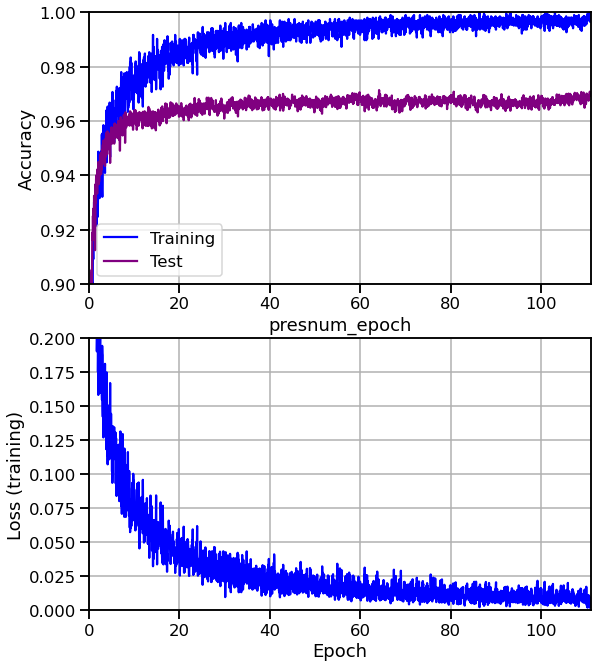

In [30]:
dato = pd.read_csv(os.path.join('perf', 'pmnist_deepsith_69.csv'))
dato.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dato['presnum_epoch'] = ((dato.presnum*64) + maxpres*dato.epoch)/maxpres

fig = plt.figure(figsize=(9,11))
ax = fig.add_subplot(2,1,1)
sn.lineplot(data=dato, x=dato.presnum_epoch, y='perf', ax=ax, 
            color='blue', dashes=[(2,2)])
sn.lineplot(data=dato, x=dato.presnum_epoch, y='test_perf', ax=ax, 
            color='purple')

ax.legend(["Training", "Test", 
           ])
#ax.set_title(dato.test_perf.max())
#ax.axvline(dato.presnum_epoch[dato.test_perf.argmax()])
ax.grid(True)
ax.set_ylabel('Accuracy')

ax.set_ylim(.9, 1.0)
ax.set_xlim(0,dato.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)

ax = fig.add_subplot(2,1,2)
sn.lineplot(data=dato, x=dato.presnum_epoch, y='loss', ax=ax, 
            color='blue', legend=False)

#ax.legend(["New Loss", "Old Loss"])
ax.set_xlim(0,dato.presnum_epoch.max())#)
ax.set_ylabel('Loss (training)')
ax.set_xlabel('Epoch')
#ax.set_xlim(0,mark)#)
ax.set_ylim(0,.2)#)

ax.grid(True)

plt.savefig('psMNIST.png',
            bbox='tight',
            edgecolor=fig.get_edgecolor(),
            facecolor=fig.get_facecolor(),
            dpi=150
            )
#print(dato.presnum_epoch.max())
#mark = dato.presnum_epoch.max()

0.9677 0.97


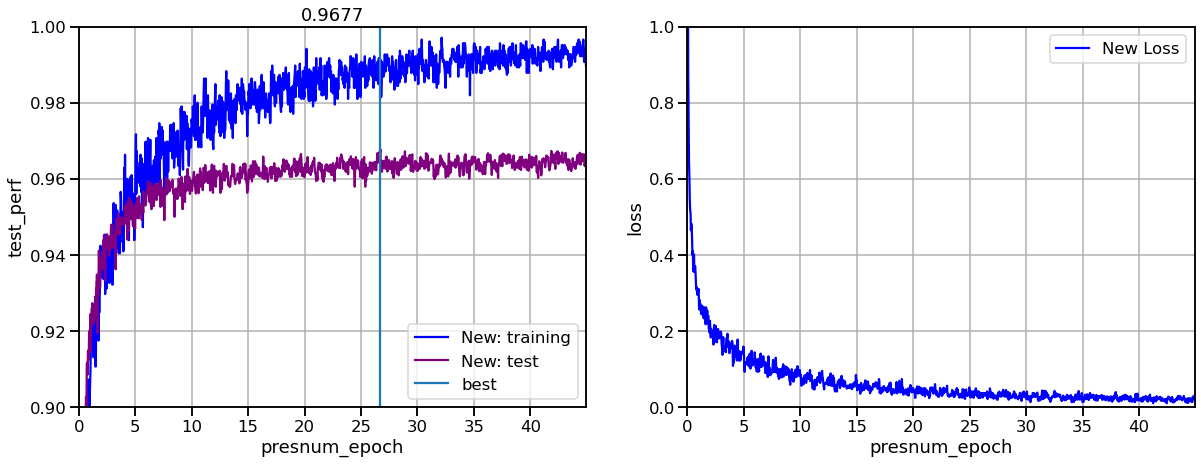

In [6]:
dat = pd.read_csv(os.path.join('perf', 'pmnist_deepsith_72.csv'))
dat.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat['presnum_epoch'] = ((dat.presnum*64) + maxpres*dat.epoch)/maxpres

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='perf', ax=ax, 
            color='blue', dashes=[(2,2)])
sn.lineplot(data=dat, x=dat.presnum_epoch, y='test_perf', ax=ax, 
            color='purple')
ax.axvline(dat.presnum_epoch[dat.test_perf.argmax()])

ax.legend(["New: training", "New: test", 
           'best'])
ax.set_title(dat.test_perf.max())

ax.grid(True)

ax.set_ylim(.9, 1.0)
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)

ax = fig.add_subplot(1,2,2)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='loss', ax=ax, 
            color='blue')

ax.legend(["New Loss", "Old Loss"])
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)
ax.set_ylim(0,1)#)

ax.grid(True)
mark = dat.presnum_epoch.max()
print(dat.test_perf.max(), dato[dato.presnum_epoch < mark].test_perf.max())

(0.0, 41.068266666666666)

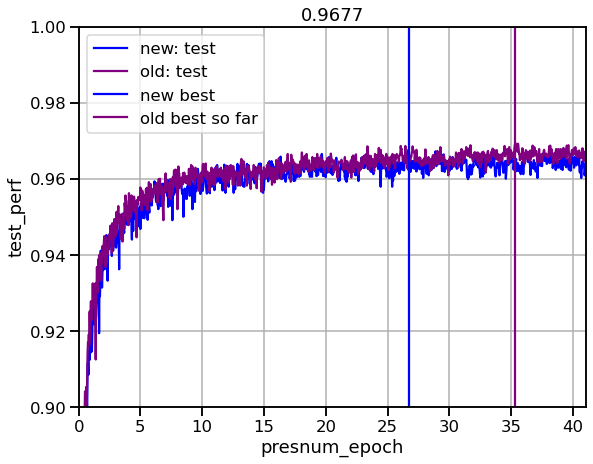

In [755]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='test_perf', ax=ax, 
            color='blue')
sn.lineplot(data=dato, x=dato.presnum_epoch, y='test_perf', ax=ax, 
            color='purple')
ax.axvline(dat.presnum_epoch[dat.test_perf.argmax()], color='blue')
ax.axvline(dato.presnum_epoch[dato[dato.presnum_epoch<=
                                  dat.presnum_epoch.max()].test_perf.argmax()], 
           color='purple')

ax.legend(["new: test", "old: test", 
           'new best', 'old best so far'])
ax.set_title(dat.test_perf.max())

ax.grid(True)

ax.set_ylim(.9, 1.0)
ax.set_xlim(0,dat.presnum_epoch.max())#)


(0.0, 12.6144)

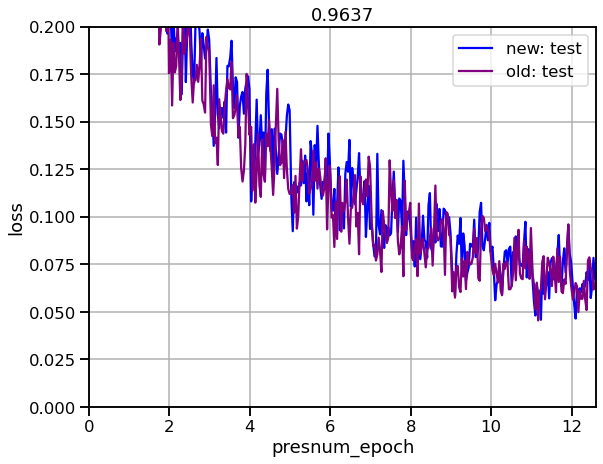

In [715]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='loss', ax=ax, 
            color='blue')
sn.lineplot(data=dato, x=dato.presnum_epoch, y='loss', ax=ax, 
            color='purple')


ax.legend(["new: test", "old: test", 
           'new best', 'old best so far'])
ax.set_title(dat.test_perf.max())

ax.grid(True)

ax.set_ylim(.0, .2)
ax.set_xlim(0,dat.presnum_epoch.max())#)


0.7814

In [ ]:
dat = pd.read_csv(os.path.join('perf', 'pmnist_deepsith_69.csv'))
dat.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat['presnum_epoch'] = ((dat.presnum*64) + maxpres*dat.epoch)/maxpres

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='perf', ax=ax, 
            color='blue', dashes=[(2,2)])
sn.lineplot(data=dat, x=dat.presnum_epoch, y='test_perf', ax=ax, 
            color='purple')

ax.legend(["New: training", "New: test", 
           "Old: training", "Old: test"])
ax.set_title(dat.test_perf.max())

ax.grid(True)

ax.set_ylim(.9, 1.0)
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)

ax = fig.add_subplot(1,2,2)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='loss', ax=ax, 
            color='blue')

ax.legend(["New Loss", "Old Loss"])
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)
ax.set_ylim(0,.2)#)

ax.grid(True)
print(dat.presnum_epoch.max())
mark = dat.presnum_epoch.max()

# sMNIST

In [416]:
dat = pd.read_csv(os.path.join('perf', 'pmnist_deepsith_50.csv'))
dat.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat['presnum_epoch'] = ((dat.presnum*20) + maxpres*dat.epoch)/maxpres
dat[dat.presnum_epoch < mark].test_perf.max()


0.9656

In [ ]:
'smnist_deepsith_2.csv'

96.7168


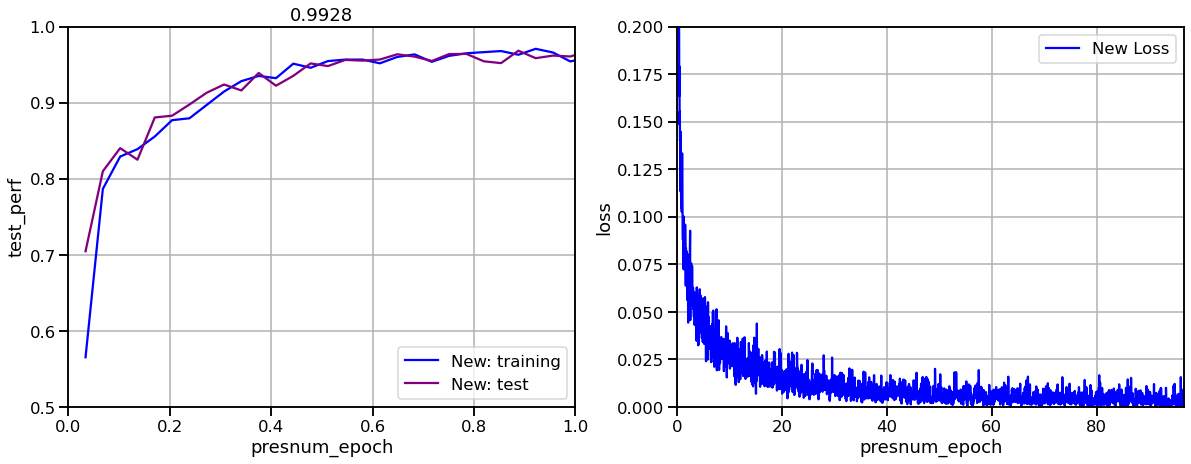

In [523]:
dato = pd.read_csv(os.path.join('perf', 'smnist_deepsith_2.csv'))
dato.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dato['presnum_epoch'] = ((dato.presnum*64) + maxpres*dato.epoch)/maxpres

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dato, x=dato.presnum_epoch, y='perf', ax=ax, 
            color='blue', dashes=[(2,2)])
sn.lineplot(data=dato, x=dato.presnum_epoch, y='test_perf', ax=ax, 
            color='purple')

ax.legend(["New: training", "New: test", 
           "Old: training", "Old: test"])
ax.set_title(dato.test_perf.max())
ax.axvline(dato.presnum_epoch[dato.test_perf.argmax()])
ax.grid(True)

ax.set_ylim(.5, 1.0)
ax.set_xlim(0,1)#dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)

ax = fig.add_subplot(1,2,2)
sn.lineplot(data=dato, x=dato.presnum_epoch, y='loss', ax=ax, 
            color='blue')

ax.legend(["New Loss", "Old Loss"])
ax.set_xlim(0,dato.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)
ax.set_ylim(0,.2)#)

ax.grid(True)
print(dato.presnum_epoch.max())
mark = dato.presnum_epoch.max()

96.7168


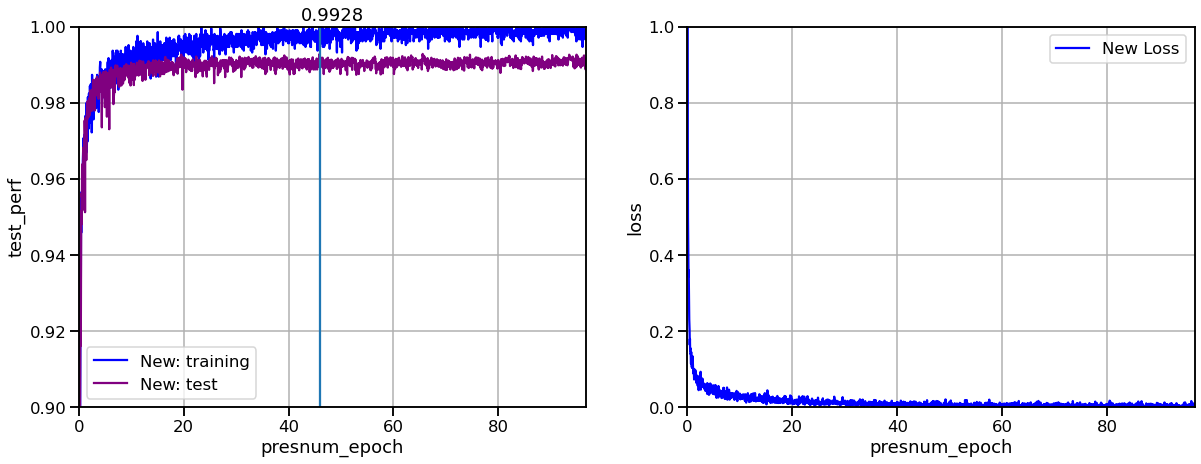

In [722]:
dat = pd.read_csv(os.path.join('perf', 'smnist_deepsith_2.csv'))
dat.columns = ['loss', 'test_perf', 'epoch', 'presnum', 'perf']
maxpres = 60000
dat['presnum_epoch'] = ((dat.presnum*64) + maxpres*dat.epoch)/maxpres

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(1,2,1)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='perf', ax=ax, 
            color='blue', dashes=[(2,2)])
sn.lineplot(data=dat, x=dat.presnum_epoch, y='test_perf', ax=ax, 
            color='purple')

ax.legend(["New: training", "New: test", 
           "Old: training", "Old: test"])
ax.set_title(dat.test_perf.max())
ax.axvline(dat.presnum_epoch[dat.test_perf.argmax()])
ax.grid(True)

ax.set_ylim(.9, 1.0)
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)

ax = fig.add_subplot(1,2,2)
sn.lineplot(data=dat, x=dat.presnum_epoch, y='loss', ax=ax, 
            color='blue')

ax.legend(["New Loss", "Old Loss"])
ax.set_xlim(0,dat.presnum_epoch.max())#)

#ax.set_xlim(0,15)#)
ax.set_ylim(0,1)#)

ax.grid(True)
print(dat.presnum_epoch.max())
mark = dat.presnum_epoch.max()

In [581]:
dato[dato.presnum_epoch <= mark].test_perf.max()

0.9390000000000001